In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.0'

In [4]:
fashion_mn = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mn.load_data()
X_test.shape

(10000, 28, 28)

In [5]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_valid.shape

(5000, 28, 28)

In [6]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [9]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Epoch 1/30
   1/1719 [..............................] - ETA: 0s - loss: 2.2919 - accuracy: 0.1250WARNING:tensorflow:From C:\Users\njaro\Anaconda3\envs\DataProjects\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1719/1719 [==============================] - 1s 871us/step - loss: 0.6086 - accuracy: 0.8421 - val_loss: 0.3063 - val_accuracy: 0.9172
Epoch 2/30
1719/1719 [==============================] - 1s 765us/step - loss: 0.2900 - accuracy: 0.9175 - val_loss: 0.2397 - val_accuracy: 0.9334
Epoch 3/30
1719/1719 [==============================] - 1s 760us/step - loss: 0.2378 - accuracy: 0.9321 - val_loss: 0.2047 - val_accuracy: 0.9428
Epoch 4/30
1719/1719 [==============================] - 1s 764us/step - loss: 0.2031 - accuracy: 0.9422 - val_loss: 0.1833 - val_accuracy: 0.9492
Epoch 5/30
1719/1719 [========

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

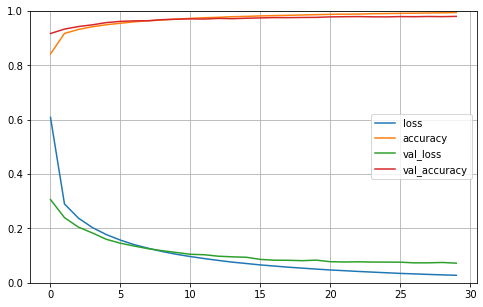

In [11]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [12]:
model.evaluate(X_test/255.0, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0720 - accuracy: 0.9783


[0.07198590040206909, 0.9782999753952026]

In [13]:
import numpy as np
x_new = X_test[:3]
np.argmax(model.predict(x_new), axis=1)

array([7, 2, 1], dtype=int64)

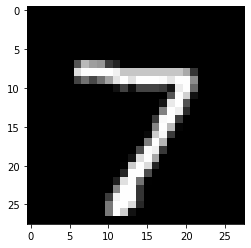

In [14]:
image = np.array(x_new[0], dtype='float')
image = image.reshape((28,28))
plt.imshow(image, cmap='gray')

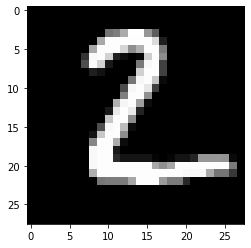

In [15]:
image = np.array(x_new[1], dtype='float')
image = image.reshape((28,28))
plt.imshow(image, cmap='gray')

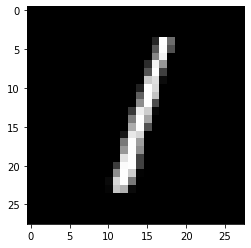

In [16]:
image = np.array(x_new[2], dtype='float')
image = image.reshape((28,28))
plt.imshow(image, cmap='gray')

In [18]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 25876), started 0:01:15 ago. (Use '!kill 25876' to kill it.)